### We applied different feature selection methods to reduce number of features 

Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

In [1]:
# Import main librarires 
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Read dataset
df=pd.read_csv('data.csv')
df.head()

,label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
Y=df.label
X=df.drop('label',axis = 1 )
feature_list=X.columns

### Chi-Square

In [4]:

select_feature = SelectKBest(chi2, k=10).fit(X, Y)
data = pd.DataFrame([])
data = data.append(pd.DataFrame({'Feature': X.columns, 'Score': select_feature.scores_}))
data

C:\Users\hager\AppData\Local\Temp/ipykernel_4812/2274897414.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.DataFrame({'Feature': X.columns, 'Score': select_feature.scores_}))


,Feature,Score
0,radius_mean,266.104917
1,texture_mean,93.897508
2,perimeter_mean,2011.102864
3,area_mean,53991.655924
4,smoothness_mean,0.149899
5,compactness_mean,5.403075
6,concavity_mean,19.712354
7,concave points_mean,10.544035
8,symmetry_mean,0.257380
9,fractal_dimension_mean,0.000074


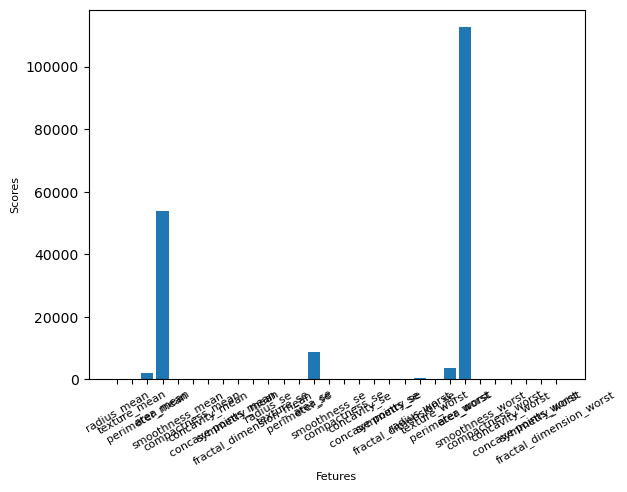

In [5]:
# Bar chart for 
index = np.arange(len(X.columns))
plt.bar(index, select_feature.scores_)
plt.xlabel('Fetures', fontsize=8)
plt.ylabel('Scores', fontsize=8)
plt.xticks(index, X.columns, fontsize=8, rotation=30)
plt.show()

### Featuers selection using Recursive Feature Elimination (REF)

RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.

In [6]:
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=11, step=1)
rfe = rfe.fit(X, Y)
print('Chosen best 11 feature by rfe:',X.columns[rfe.support_])

Chosen best 11 feature by rfe: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'concave points_worst'],
      dtype='object')


In [7]:
data = pd.DataFrame([])
data = data.append(pd.DataFrame({'Feature': X.columns, 'Score': rfe.ranking_}))
data

C:\Users\hager\AppData\Local\Temp/ipykernel_4812/3676598920.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.DataFrame({'Feature': X.columns, 'Score': rfe.ranking_}))


,Feature,Score
0,radius_mean,1
1,texture_mean,4
2,perimeter_mean,1
3,area_mean,1
4,smoothness_mean,11
5,compactness_mean,9
6,concavity_mean,1
7,concave points_mean,1
8,symmetry_mean,17
9,fractal_dimension_mean,20
